In [1]:
import pandas as pd

resultados_exames = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnosticos = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns = 'exame_33')

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnosticos,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

print('Resultado da classificação: %.2f%%' %(classificador.score(teste_x, teste_y) * 100))

Resultado da classificação: 92.40%


In [3]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = 'most_frequent')
classificador_bobo.fit(treino_x, treino_y)

print('Resultado da classificação de base: %.2f%%' %(classificador_bobo.score(teste_x, teste_y) * 100))

Resultado da classificação de base: 66.67%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

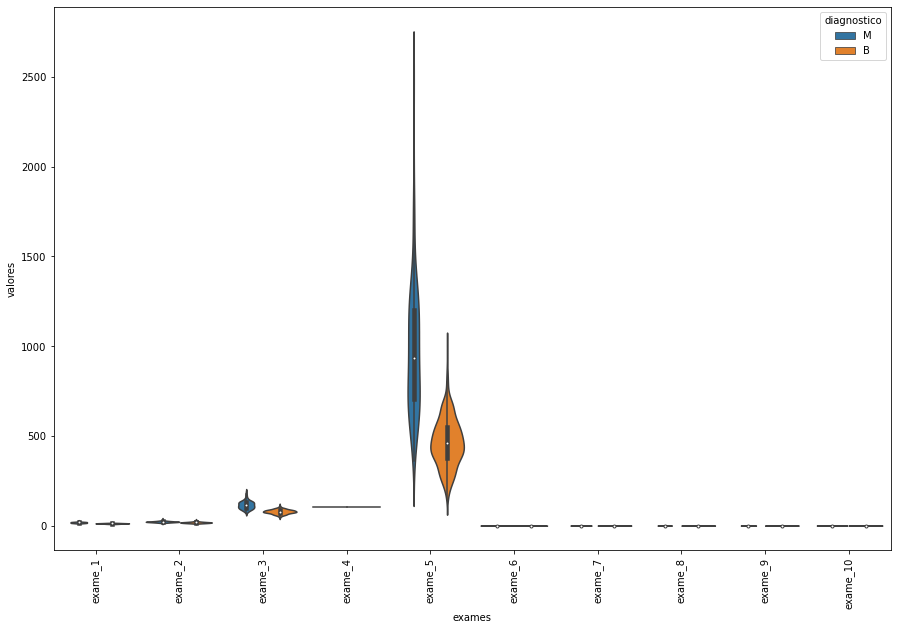

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnosticos, valores_exames_v1.iloc[:, 0:10]], axis= 1)
dados_plot = pd.melt(dados_plot, id_vars= 'diagnostico',
                    var_name='exames',
                    value_name= 'valores')

plt.figure(figsize=(15,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot)
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

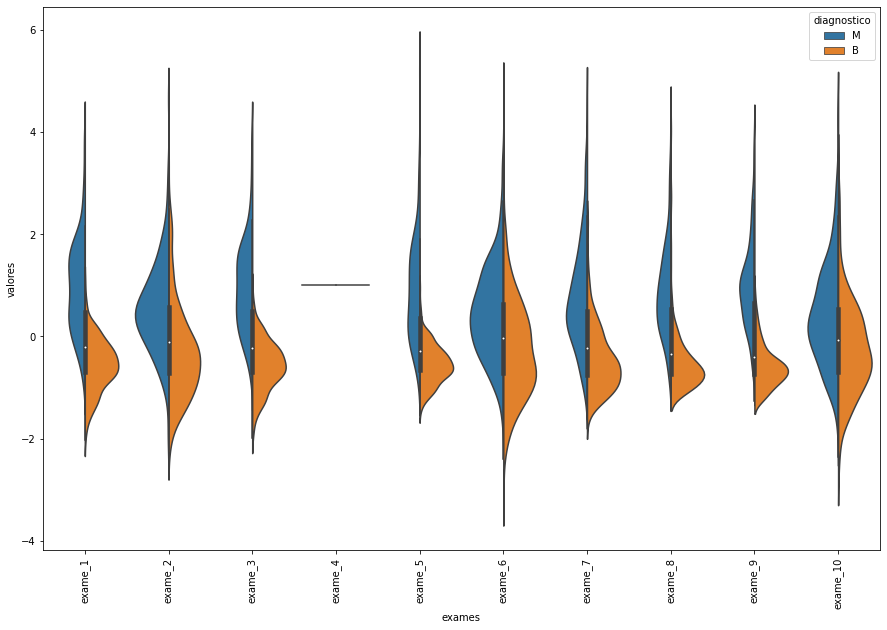

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data= valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnosticos, valores_exames_v2.iloc[:, 0:10]], axis= 1)
dados_plot = pd.melt(dados_plot, id_vars= 'diagnostico',
                    var_name='exames',
                    value_name= 'valores')

plt.figure(figsize=(15,10))
sns.violinplot(x = 'exames', y = 'valores',
               hue = 'diagnostico', data = dados_plot,
               split = True)
plt.xticks(rotation= 90)

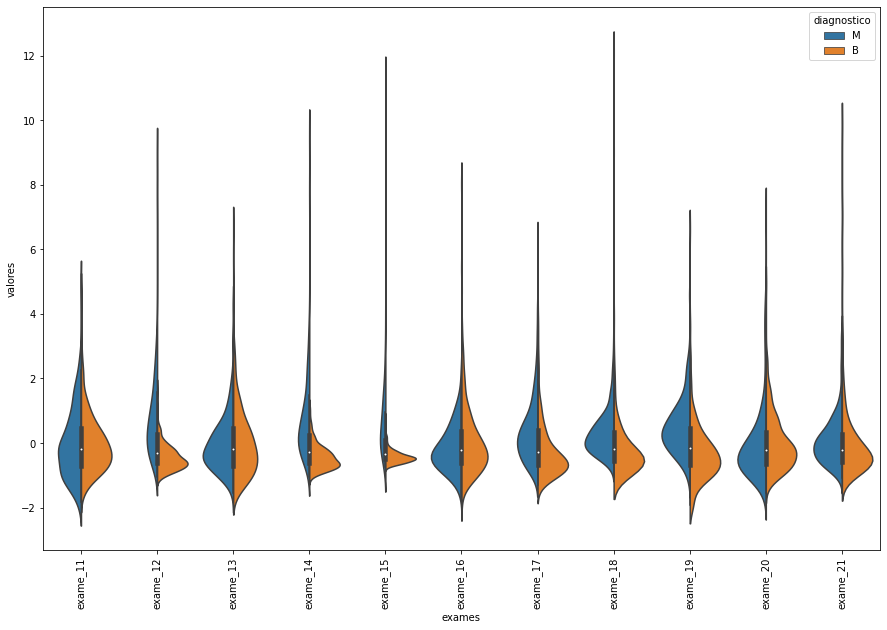

In [6]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnosticos, valores.iloc[:, inicio:fim]], axis= 1)
    dados_plot = pd.melt(dados_plot, id_vars= 'diagnostico',
                        var_name='exames',
                        value_name= 'valores')

    plt.figure(figsize=(15,10))
    sns.violinplot(x = 'exames', y = 'valores',
                   hue = 'diagnostico', data = dados_plot,
                   split = True)
    plt.xticks(rotation= 90)
    
grafico_violino(valores_exames_v2, 10, 21)

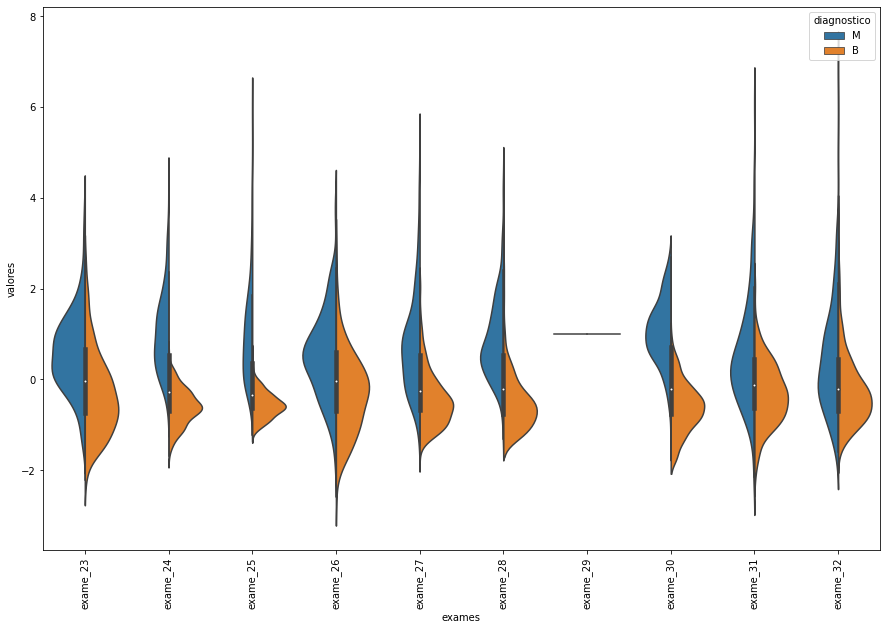

In [7]:
grafico_violino(valores_exames_v2, 22, 32)

In [8]:
valores_exames_v3 = valores_exames_v2.drop(columns= ['exame_4', 'exame_29'])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnosticos,
                                                       test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)

    print('Resultado da classificação: %.2f%%' %(classificador.score(teste_x, teste_y) * 100))
    

classificar(valores_exames_v3)

Resultado da classificação: 92.98%


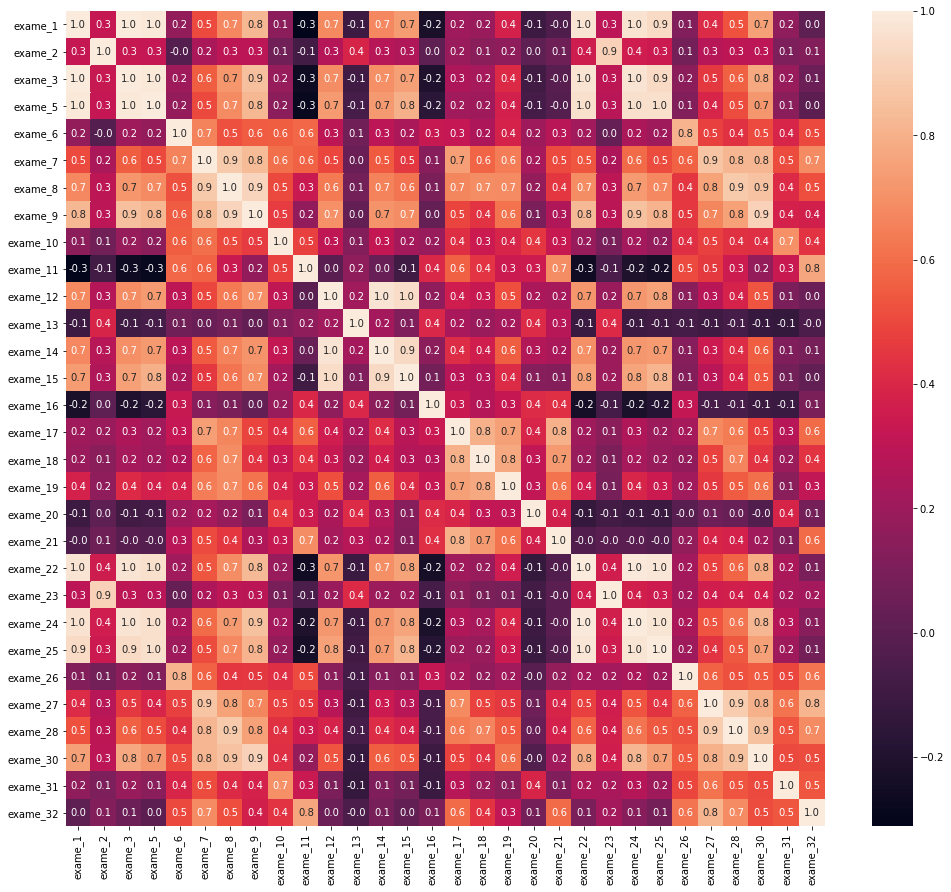

In [16]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize= (17,15))
sns.heatmap(matriz_correlacao, annot= True, fmt= '.1f')

In [17]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [19]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [20]:
valores_exames_v4 = valores_exames_v3.drop(columns= variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [21]:
classificar(valores_exames_v4) ## Retirada atrapalhou a acurácia da classificação,
                               ## porque retiramos todas as variáveis correlacionadas,
                               ## retiramos uma e deixamos a outra!!!

Resultado da classificação: 91.81%


In [24]:
valores_exames_v5 = valores_exames_v3.drop(columns= ['exame_3', 'exame_24'])
classificar(valores_exames_v5) ## conseguimos tirar mais 2 dimensões sem impacto para o modelo!

Resultado da classificação: 92.98%


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

valores_exames_v6 = valores_exames_v1.drop(columns= ['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [31]:
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnosticos,
                                                        test_size= 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [32]:
treino_kbest.shape

(398, 5)

In [33]:
classificador = RandomForestClassifier(n_estimators= 100, random_state= 1234)
classificador.fit(treino_kbest, treino_y)

print('Resultado da classificação: %.2f%%' %(classificador.score(teste_kbest, teste_y) * 100))

Resultado da classificação: 92.40%


In [34]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(43.5, 0.5, 'Real'), Text(0.5, 25.5, 'Predição')]

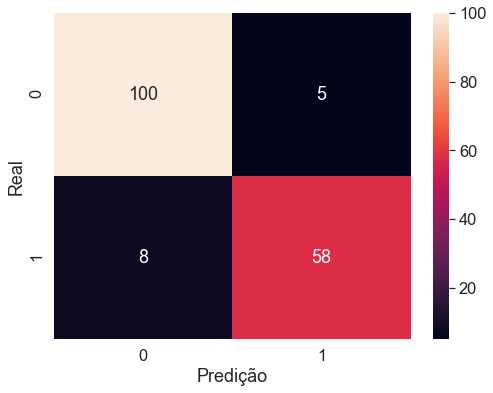

In [38]:
plt.figure(figsize= (8,6))
sns.set(font_scale= 1.5)
sns.heatmap(matriz_confusao, annot= True, fmt= 'd').set(xlabel= 'Predição', ylabel= 'Real')

Resultado da classificação: 90.06%


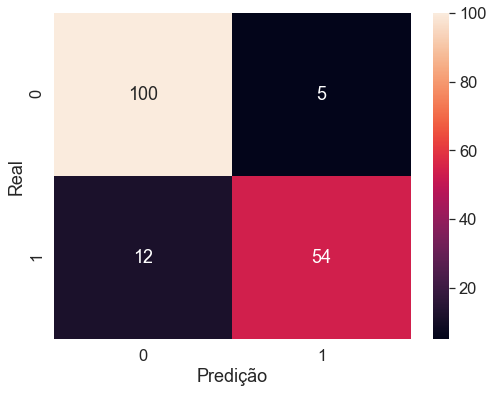

In [39]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnosticos,
                                                        test_size= 0.3)

classificador = RandomForestClassifier(n_estimators= 100, random_state= 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator= classificador, n_features_to_select= 5, step= 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)


matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))

plt.figure(figsize= (8,6))
sns.set(font_scale= 1.5)
sns.heatmap(matriz_confusao, annot= True, fmt= 'd').set(xlabel= 'Predição', ylabel= 'Real')

print('Resultado da classificação: %.2f%%' %(classificador.score(teste_rfe, teste_y) * 100))